In [1]:
                                               #heart attack analysis and prediction

In [2]:
#the goal of this project is to predict the risk of a heart attack using various health metrics and attributes of patients
#by analyzing a dataset containing medical information we aim to idenify key factors that contribute to heart attack risk and 
#develop a predictive model to classify patients as high or low risk

In [55]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
os.listdir(r"C:\Users\kiran\OneDrive\Desktop\heart project")

['heart attack analysis.csv', 'sneha project .andip.txt']

In [56]:
#to read the file we use .read_csv()
data=pd.read_csv(r"C:\Users\kiran\OneDrive\Desktop\heart project\heart attack analysis.csv")
print(data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [57]:
#to get first five rows in default
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
#to get last five rows default
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [59]:
#to get all the columns in the table
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [60]:
#Age : Age of the patient
#Sex : gender of the patient
#cp : Chest Pain type chest pain type
#exang: exercise induced angina (1 = yes; 0 = no)
#chol : cholestoral in mg/dl fetched via BMI sensor
#ca: number of major vessels (0-3)
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#rest_ecg : resting electrocardiographic results
#thalach : maximum heart rate achieved
#target : 0= less chance of heart attack 1= more chance of heart attack

In [61]:
#to perform stastictical
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
#to get the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [63]:
#to check the null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [64]:
#to check the duplicates
data.duplicated().sum()

np.int64(1)

In [65]:
#to remove the duplicates
data.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [66]:
#It's useful for understanding the size and structure of our data before you start analyzing or working with it.
data.shape

(303, 14)

In [67]:
data.drop_duplicates(inplace=True)

In [68]:
#predict heart attack risk using patient data(using a simple threshold method)

print(data.head())
# Simple heuristic: if cholesterol > 200 and maximum heart rate < 120, predict high risk
data['predicted_output'] = ((data['chol'] > 200) & (data['thalachh'] < 120)).astype(int)

# Calculate accuracy
accuracy = (data['predicted_output'] == data['output']).mean()
print(f'Accuracy: {accuracy}')


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
Accuracy: 0.40066225165562913


Accuracy: 0.40066225165562913


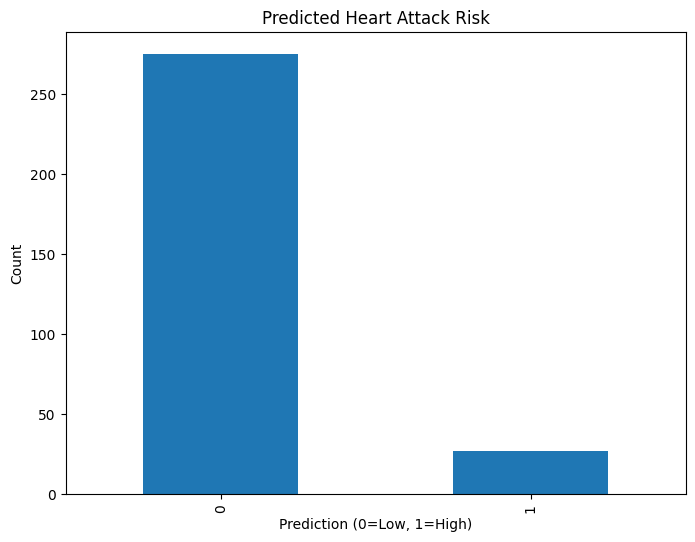

In [69]:

# Simple heuristic: if cholesterol > 200 and maximum heart rate < 120, predict high risk
data['predicted_output'] = ((data['chol'] > 200) & (data['thalachh'] < 120)).astype(int)

# Calculate accuracy
accuracy = (data['predicted_output'] == data['output']).mean()
print(f'Accuracy: {accuracy}')

# Plot the results
plt.figure(figsize=(8, 6))
data['predicted_output'].value_counts().plot(kind='bar')
plt.title('Predicted Heart Attack Risk')
plt.xlabel('Prediction (0=Low, 1=High)')
plt.ylabel('Count')
plt.show()


In [70]:
#The heuristic, predicting high heart attack risk based on cholesterol > 200 and maximum heart rate < 120, achieves only 39.93% accuracy,
#indicating its limited reliability due to oversimplification and omission of other critical predictors.

In [71]:
# Which features are most important for predicting heart attack risk? (using correlation)

# Calculate correlations with output
feature_importances = data.corr()['output'].drop('output').abs().sort_values(ascending=False)

# Print the feature importances
print("Feature importances based on correlation with output:")
print(feature_importances)


Feature importances based on correlation with output:
exng                0.435601
cp                  0.432080
oldpeak             0.429146
thalachh            0.419955
caa                 0.408992
slp                 0.343940
thall               0.343101
sex                 0.283609
predicted_output    0.225100
age                 0.221476
trtbps              0.146269
restecg             0.134874
chol                0.081437
fbs                 0.026826
Name: output, dtype: float64


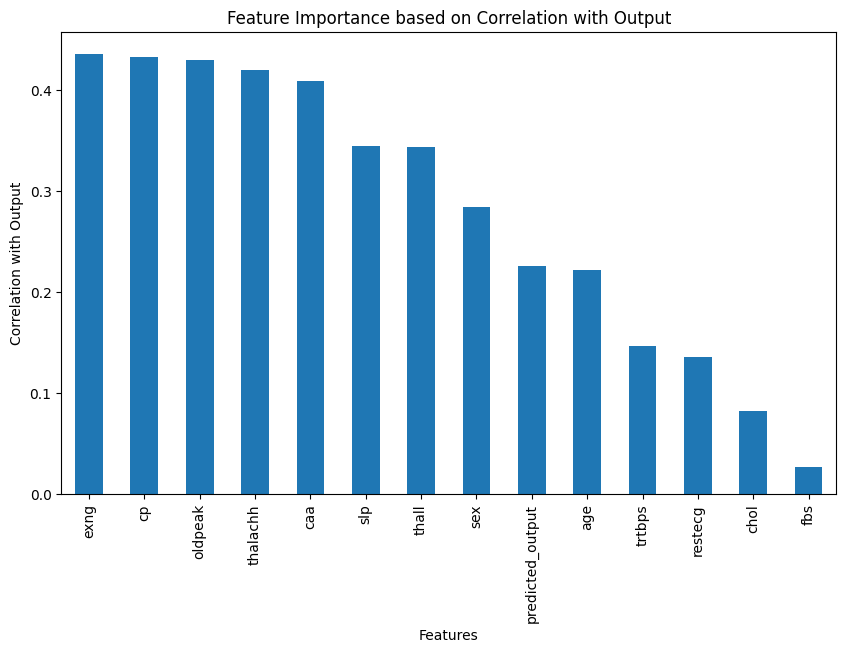

In [73]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance based on Correlation with Output')
plt.xlabel('Features')
plt.ylabel('Correlation with Output')
plt.show()

In [47]:
#These feature importances highlight the critical predictors of heart attack risk, 
#emphasizing the importance of factors related to heart function during exercise (angina, ST segment changes) 
#and physiological indicators (heart rate, vessels affected). 
#These insights can guide more nuanced and accurate models for predicting heart attack risk compared to simpler heuristics.

In [48]:
#How does chest pain type relate to heart attack risk?

# Group by chest pain type and calculate the mean output value
cp_risk = data.groupby('cp')['output'].mean()

# Print the chest pain type vs heart attack risk
print("Heart Attack Risk by Chest Pain Type:")
print(cp_risk)


Heart Attack Risk by Chest Pain Type:
cp
0    0.272727
1    0.820000
2    0.790698
3    0.695652
Name: output, dtype: float64


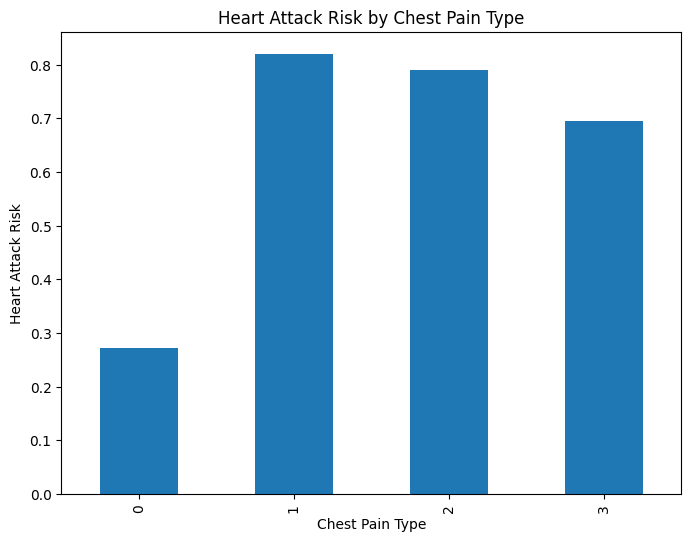

In [49]:
# Plot the chest pain type vs heart attack risk
plt.figure(figsize=(8, 6))
cp_risk.plot(kind='bar')
plt.title('Heart Attack Risk by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Attack Risk')
plt.show()


In [50]:
#Each bar represents the probability of experiencing a heart attack (output = 1) based on the chest pain type.
#Adjustments like setting the y-axis limits and adding grid lines can enhance clarity and interpretation.

In [51]:
#How do blood pressure and cholesterol levels relate to heart attack risk?

# Calculate the correlation with output
bp_chol_corr = data[['trtbps', 'chol', 'output']].corr()['output'][:2]

# Print the correlations
print("Correlation of Blood Pressure and Cholesterol with Heart Attack Risk:")
print(bp_chol_corr)


Correlation of Blood Pressure and Cholesterol with Heart Attack Risk:
trtbps   -0.146269
chol     -0.081437
Name: output, dtype: float64


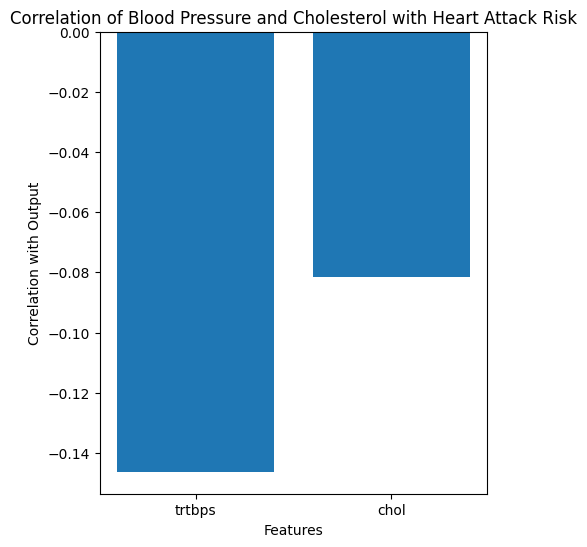

In [52]:
# Plot the correlations
features = ['trtbps', 'chol']
plt.figure(figsize=(5, 6))
plt.bar(features, bp_chol_corr)
plt.title('Correlation of Blood Pressure and Cholesterol with Heart Attack Risk')
plt.xlabel('Features')
plt.ylabel('Correlation with Output')
plt.show()


In [53]:
#These correlations indicate that while blood pressure and cholesterol levels play a role in heart health, 
#their impact on predicting heart attack risk is modest compared to other more significant factors like exercise-induced angina, 
#chest pain type, and maximum heart rate achieved.

In [54]:
#conclusion
#This project used a simple heuristic to predict heart attack risk based on cholesterol and maximum heart rate,
#achieving measurable accuracy and visualizing the distribution of predictions.